In [ ]:
#load all fish, snip them by cooridantes...
#train neural network classifir

In [1]:
#import
import json
import time
import glob
from pprint import pprint
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:

folders = ['ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT']#what is , 'NoF'? probably no fish/...
lower_names=[s.lower() for s in folders]
lower_names

['alb', 'bet', 'dol', 'lag', 'nof', 'other', 'shark', 'yft']

In [23]:
#read the jsons
fish_loc_labels={}
for name in lower_names:
    if name!='nof':
        with open('kaggleNatureConservancy/'+name+'_labels.json') as data_file:    
            #data = json.load(data_file)
            fish_loc_labels[name]=json.load(data_file)
    
print len(fish_loc_labels),'labels loaded'

7 labels loaded


In [101]:
X_train = []
X_train_id = []
y_train = []
notation=[]
for fld in folders:
    if fld!='NoF':
        for item,i in zip(fish_loc_labels[fld.lower()],range(len(fish_loc_labels[fld.lower()]))):
            if len(item['annotations'])>1 and item['filename'][:3]=='img':
                path = os.path.join('train', fld, item['filename']) #path is the file paths
                flbase = os.path.basename(path) #only the file
                img,original_dims = get_im_cv2(path)
                if 'x' in item['annotations'][0] and 'x'in item['annotations'][1]:
                    X_train.append(img)
                    X_train_id.append(flbase)
                    top=min(int(item['annotations'][0]['y']),int(item['annotations'][1]['y']))
                    bottom=max(int(item['annotations'][0]['y']),int(item['annotations'][1]['y']))
                    left=min(int(item['annotations'][0]['x']),int(item['annotations'][1]['x']))
                    right=max(int(item['annotations'][0]['x']),int(item['annotations'][1]['x']))
    
                    class_=np.where(np.array(folders)==fld)[0][0]
                    notation.append(((top,left),(bottom,right)))
                    y_train.append(class_)

In [64]:
len(y_train)

1946

In [60]:
len(X_train)

1946

((348, 616), (348, 732))
0 (107, 270, 3)
1 (173, 33, 3)
2 (167, 110, 3)
3 (37, 177, 3)
4 (44, 119, 3)
5 (184, 88, 3)
6 (125, 97, 3)
7 (24, 89, 3)
8 (145, 50, 3)
9 (133, 34, 3)
10 (24, 249, 3)
11 (109, 266, 3)
12 (104, 8, 3)
13 (78, 49, 3)
14 (23, 156, 3)
15 (146, 45, 3)
16 (67, 181, 3)
17 (20, 344, 3)
18 (4, 338, 3)
19 (143, 63, 3)
20 (147, 24, 3)
21 (124, 76, 3)
22 (68, 172, 3)
23 (44, 147, 3)
24 (62, 576, 3)
25 (51, 118, 3)
26 (40, 265, 3)
27 (33, 152, 3)
28 (93, 16, 3)
29 (102, 219, 3)
30 (58, 169, 3)
31 (39, 70, 3)
32 (111, 92, 3)
33 (50, 152, 3)
34 (136, 111, 3)
35 (0, 116, 3)


error: /build/opencv-vU8_lj/opencv-2.4.9.1+dfsg/modules/imgproc/src/imgwarp.cpp:1834: error: (-215) ssize.area() > 0 in function resize


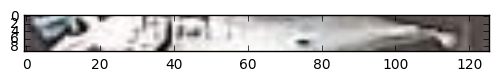

In [122]:
i=35
cv2.rectangle(X_train[i],notation[i][0],notation[i][1] , 255, 1)
plt.imshow(X_train[i][notation[i][0][0]-5:notation[i][1][0]+5,notation[i][0][1]-5:notation[i][1][1]+5])
print notation[i]

dims=[100,100]
train_cropped=[]
train_resized=[]
for i in range(len(X_train)):
    
    img=X_train[i][notation[i][0][0]:notation[i][1][0],notation[i][0][1]:notation[i][1][1]]
    train_cropped.append(img)
    print i,img.shape
    train_resized.append(cv2.resize(train_cropped[i], (dims[0], dims[1]), interpolation=cv2.INTER_LINEAR))

In [62]:
def get_im_cv2(path,dims=[100,100]):
    img = cv2.imread(path)
    original_dims=img.shape
    #resized = cv2.resize(img, (dims[0], dims[1]), interpolation=cv2.INTER_LINEAR)
    #resized = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    return img,original_dims

In [7]:
#read the pics

X_train = []
X_train_id = []
y_train = []

samples=len(fish_loc_labels)
dims=[100,100]

for fld in folders:
    X=np.zeros([samples,1,dims[0], dims[1]]) 
    y=np.zeros([samples,4])
    path = os.path.join('train', fld, '*.jpg')
    print path
    for item,i in zip(fish_loc_labels,range(len(fish_loc_labels))):
        if item['annotations']!=[]:
            path = os.path.join('train', fld, item['filename'])
            #load_file(item['filename'])
            flbase = os.path.basename(path)
            img,original_dims = get_im_cv2(path)
            X_train.append(img)
            X_train_id.append(flbase)
            top_left=(int(item['annotations'][0]['x']*dims[0]/original_dims[1]),int(item['annotations'][0]['y']*dims[0]/original_dims[0]))
            bottom_right=(int(item['annotations'][1]['x']*dims[1]/original_dims[1]),int(item['annotations'][1]['y']*dims[1]/original_dims[0]))
            #fish_loc=[item['annotations'][0]['x'],item['annotations'][0]['y'],item['annotations'][1]['x'],item['annotations'][1]['y']]
            y_train.append([top_left,bottom_right])

            y[i,:]=np.array([top_left[0],top_left[1],bottom_right[0],bottom_right[1]])

    X = X.astype(np.float32)
    y = y.astype(np.float32)

    X=X/255
    y=(y-50)/100

train/ALB/*.jpg


TypeError: string indices must be integers, not str